### This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

# Machine Learning Foundation Nanodegree

## Project: Investigate a TMDb Movie Database

Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

# Introduction

The dataset that I have chosen is the TMDb dataset which contains data on the movies and its ratings. The various trends that are to be explored in the same are going to be:


- The popularity of the movies over the years
- The revenue made by the movies over the years 

We will see the comparison among the following:
- Revenue versus Popularity 
- Revenue versus Votings 

Let us see what are the questions that we will be answering:
- What is the runtime of the movies, its revenue, and popularity over the years?
- How do the votings affect the revenue of the movie?
- Is revenue directly proportional to popularity?

The dataset that we will be investigating in this project will be explanatory and any associations will be tentative as we will be just performing visualizations and basic correlations. 

The three variables that we will be investigating are:
- Single variable (1d) explorations that are Popularity, Revenue, Run-time over time 
- Multi-variable (2d) explorations that are Revenue over time for factors like Votings, Popularity

In [2]:
import pandas as pd
import csv 
from datetime import datetime 
import matplotlib.pyplot as plt
% matplotlib inline

# Data Wrangling - Presenting the Data

In this section of the report, we will load the data and check for cleanliness, and then trim and clean the dataset for analysis.

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#loading the data form csv file for analyzing it 
df = pd.read_csv('tmdb-movies.csv', encoding='ISO-8859-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Then we will be deleting all the duplicates that are present in the dataset 

In [5]:
# check how many duplicated records are present
sum(df.duplicated())

1

In [7]:
# Delete the duplicated rows  

df.drop_duplicates(inplace=True)

In [8]:
#Check the dataset to make sure the duplicates are removed 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

## NULL Values


In this step we will look at the dataset and inspect if it is sufficicnt for our initial reserach. Then depending on the results, we will go furtehr into how are we going to deal with the missing values. 


In [9]:
# To check if any of the columns have null values 

df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

## Data Cleaning 


Now here, after we have seen the structure of our TMBd dataset and deleting the duplicated values, we will clean in this part. 
As we observed in the above step that few columns have null values. The only relevant thing for us is the imbd_id. We will be removing the null values in this section using dropna process. 
In the remaining columns that contain the missing values are not the factors that we need for our analysis. 

In [10]:
# To drop the rows taht contain the missing values in imdb_id column

df.dropna(subset=['imdb_id'], inplace=True)  
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 10865
Data columns (total 21 columns):
id                      10855 non-null int64
imdb_id                 10855 non-null object
popularity              10855 non-null float64
budget                  10855 non-null int64
revenue                 10855 non-null int64
original_title          10855 non-null object
cast                    10779 non-null object
homepage                2934 non-null object
director                10815 non-null object
tagline                 8038 non-null object
keywords                9368 non-null object
overview                10852 non-null object
runtime                 10855 non-null int64
genres                  10834 non-null object
production_companies    9830 non-null object
release_date            10855 non-null object
vote_count              10855 non-null int64
vote_average            10855 non-null float64
release_year            10855 non-null int64
budget_adj              1

In [11]:
# To view the dataset 

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [12]:
# Now we will save this new dataset which has no duplicates

df.to_csv('data_imdb.csv', index=False)

## Exploratory Data Analysis

### Question 1 

What is the runtime of the movies, its revenue, and popularity over the years?

In this analysis, we have to first group our dataset based on the years with the help of the variable 'release_year'.
We will be performing the visualizations using in-built fucntions and histograms 

In [15]:
# First we will import the data from the dataset that we cleaned above

df_imdb = pd.read_csv('data_imdb.csv')
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10855 entries, 0 to 10854
Data columns (total 21 columns):
id                      10855 non-null int64
imdb_id                 10855 non-null object
popularity              10855 non-null float64
budget                  10855 non-null int64
revenue                 10855 non-null int64
original_title          10855 non-null object
cast                    10779 non-null object
homepage                2934 non-null object
director                10815 non-null object
tagline                 8038 non-null object
keywords                9368 non-null object
overview                10852 non-null object
runtime                 10855 non-null int64
genres                  10834 non-null object
production_companies    9830 non-null object
release_date            10855 non-null object
vote_count              10855 non-null int64
vote_average            10855 non-null float64
release_year            10855 non-null int64
budget_adj              1

In [16]:
# Here we will group the input data by release_year variable and then compute the mean values for the numeric columns

df_1 = df_imdb.groupby('release_year').mean()

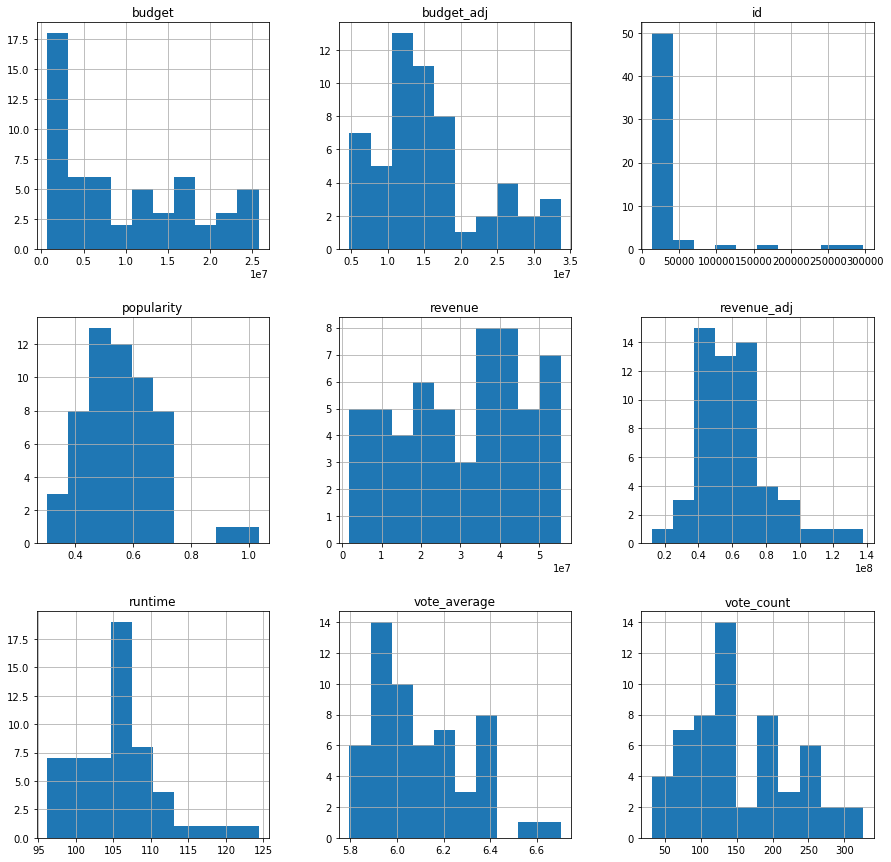

In [18]:
# To visualize the dataset 

df_1.hist(figsize=(15,15));

### Runtime 

Here we will be determining if runtime has had any effect on the popularity of the movies. Then we will be visualizing it with the help of histograms.


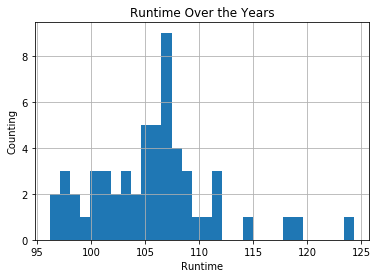

In [19]:
df_1['runtime'].hist(bins=30)
plt.xlabel('Runtime')
plt.ylabel('Counting')
plt.title('Runtime Over the Years');

In [21]:
# To view the visualization numerically

df_1['runtime'].describe()

count     56.000000
mean     105.714644
std        5.508458
min       96.179331
25%      101.910776
50%      105.678699
75%      107.593247
max      124.343750
Name: runtime, dtype: float64

### Observations


- We can see that the runtime is popular in between 106 and 107 minutes 
- The movies fall in the range of 105 to 107 
- The visualization shows that the distribution is right skewed 

### Popularity

Here we want to see how the movie ratings will be deceived over the years. Visually the maximum count will reflect the popularity of the movie based on its ratings. 

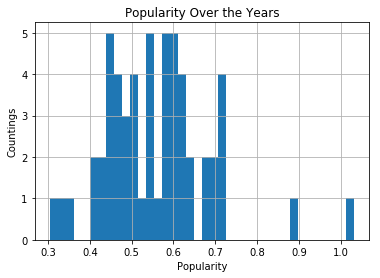

In [22]:
# Here we will look at the popularity variable in order to determine the ratings 

df_1['popularity'].hist(bins=38)
plt.xlabel('Popularity')
plt.ylabel('Countings')
plt.title('Popularity Over the Years');

In [24]:
# To view the visualization numerically

df_1['popularity'].describe()

count    56.000000
mean      0.559693
std       0.128434
min       0.304112
25%       0.469625
50%       0.546928
75%       0.626934
max       1.032126
Name: popularity, dtype: float64

### Observations

- We can see that the maximum ratings fall in between 0.44 to 0.62
- The disturbution is observed to be skewed to the right

### Revenue

Here we will determining the revenue of the movie that is generated over the years. Using histogram, we will be doing the visualizations and then the maximum counting will tell us about the revenue that is earned by the movies. 

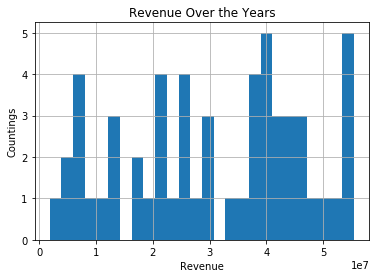

In [27]:
# Here we will look at the revenue variable over the years in order to determine typical revenues grossed by the movies

df_1['revenue'].hist(bins=26)
plt.xlabel('Revenue')
plt.ylabel('Countings')
plt.title('Revenue Over the Years');

In [29]:
# To view the visualization numerically

df_1['revenue'].describe()

count    5.600000e+01
mean     3.076766e+07
std      1.574209e+07
min      1.842102e+06
25%      1.815642e+07
50%      3.257984e+07
75%      4.293171e+07
max      5.549569e+07
Name: revenue, dtype: float64

### Observations


We can observe that 
- The distribution is observed to be left skewed 
- The revenues are seen to be varying widely 

### Question 2

What are the variables which are associated with the revenue of the movies in the years and how? 

The steps that we will be performing are:

- In order to answer the above question, we will be looking at the correlation of the variables from the dataset that is grouped over the years
- Here we will be visualizing the relation between two variables 


The observations are based on:
- Revenue vs Popularity
- Revenue vs Votings

In [25]:
# Here we will use correlation to determine the factors which are influencing revenue 

df_1.corr(method='pearson')

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
id,1.000000,0.612610,0.100292,0.152558,-0.441775,0.539964,-0.297719,-0.148336,-0.299723
popularity,0.612610,1.000000,0.668215,0.759156,-0.488974,0.849314,-0.574979,0.458952,-0.100506
budget,0.100292,0.668215,1.000000,0.906124,-0.401485,0.782026,-0.731797,0.891925,-0.158415
revenue,0.152558,0.759156,0.906124,1.000000,-0.466239,0.809243,-0.706442,0.767164,0.074952
runtime,-0.441775,-0.488974,-0.401485,-0.466239,1.000000,-0.612715,0.524770,-0.073168,0.300077
vote_count,0.539964,0.849314,0.782026,0.809243,-0.612715,1.000000,-0.658819,0.505434,-0.215568
vote_average,-0.297719,-0.574979,-0.731797,-0.706442,0.524770,-0.658819,1.000000,-0.557569,0.377204
budget_adj,-0.148336,0.458952,0.891925,0.767164,-0.073168,0.505434,-0.557569,1.000000,0.050086
revenue_adj,-0.299723,-0.100506,-0.158415,0.074952,0.300077,-0.215568,0.377204,0.050086,1.000000


## Revenue versus Popularity

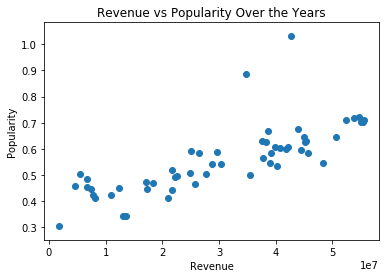

In [31]:
# We will visualize this with the help of a scatterplot of revenue and popularity over the years

plt.scatter(x=df_1['revenue'], y=df_1['popularity'])
plt.xlabel('Revenue')
plt.ylabel('Popularity')
plt.title('Revenue vs Popularity Over the Years');

### Observations- Revenue vs Popularity

In the above scatterplot, we can see that the popularity of the movies is directly proportional to the revenues. 

## Revenue versus Votings

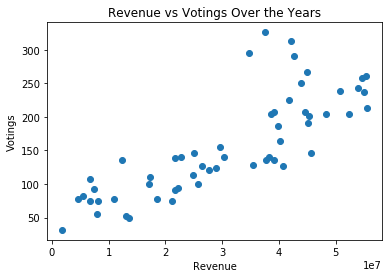

In [32]:
# We will visualize this with the help of a scatterplot of revenue and votings over the years


plt.scatter(x=df_1['revenue'], y=df_1['vote_count'])
plt.xlabel('Revenue')
plt.ylabel('Votings')
plt.title('Revenue vs Votings Over the Years');

### Observations- Revenue vs Vote Count

- The votings is almost proportional to the revenue of the movies 
- We can also see that few of the samples have some high voting counts and did not gross in the revenue section

# Limitations


- We worked with runtime of the movies, the popularity and revenue of the same 
- The analysis was restricted to the numerical values where dollar, rupees, etc was not considered. 
- If the varying currencies will be taken in consideration then the conversions or normalization needs to be performed
- We have looked at other sources like the sales of the mvie tickets, the audio rights sales, sales of the broadcasts, etc. 
- The voting counts are taken at the face value where we did not look into the nature of the same whether it is good or bad. 
- The popularity medium is very much unknown which can have an impact on the analysis as limitations and the bias inherent are present in the end values. 

# Conclusion

- From our EDA we analyzed that there are different patterns in the revenue, popularity and runtime of the movie over the years
- The results are tentative but we observed the runtime to be popular in between 106 minutes and 107 minutes 
- The ratings were observed to be in the range of 0.44 to 0.62
- We also found out that the Popularity of the movies and the revenue have a direct relation between them
- The voting counts and the revenue is also observed to be related positively
- The relations that we derived are just correlations 

In [38]:
from  subprocess  import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0